In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, IntegerLookup
from keras.models import Model
from keras.optimizers import SGD
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder


In [2]:
prefs = pd.read_csv("ratings.csv", sep=",")
prefs.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
prefs.shape

(100836, 4)

**Embedding Layer**
It takes an integer and outputs a vector. In other words, it maps integers to a vector of size n.

In [18]:
n_users = prefs.iloc[:,0].unique().size
n_items = prefs.iloc[:,1].unique().size
n_prefs = prefs.iloc[:,1].size
n_factors = 2

user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    
# Embedding layer
MF_Embedding_User = Embedding(input_dim = n_users, output_dim = n_factors, name = 'mf_embedding_user')(user_input)
MF_Embedding_Item = Embedding(input_dim = n_items, output_dim = n_factors, name = 'mf_embedding_item')(item_input)   


# Concatenate the embeddings 
concatenated = Concatenate()([MF_Embedding_User, MF_Embedding_Item])
#conc = Flatten()(concatenated)

# concatenate features
#dot = Dot(axes=1)([mf_user_latent, mf_item_latent])

# add fully-connected-layers
fc1 = Dense(32, activation='relu')(concatenated)
#fc2 = Dense(128, activation='relu')(fc1)
#fc3 = Dense(128, activation='relu')(fc2)
out = Dense(1)(fc1)
#out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

# Create model and compile it
model = Model(
    inputs = [user_input, item_input],
    outputs = out,
)

model.compile(
    
  loss='MSE',
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  metrics=['MAE'],
)



In [19]:
le = LabelEncoder()
x1 = le.fit_transform(prefs['userId'].values)
x2 = le.fit_transform(prefs['movieId'].values)

y = prefs.iloc[:,2]
#user_ids_vocabulary = tf.keras.layers.IntegerLookup(mask_token=None)
#user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))

In [20]:
history = model.fit([x1,x2], y, epochs=5, validation_split=.05)

Epoch 1/5
2994/2994 [==============================] - 13s 4ms/step - loss: 1.3336 - MAE: 0.8386 - val_loss: 1.0793 - val_MAE: 0.8624
Epoch 2/5
2994/2994 [==============================] - 14s 5ms/step - loss: 0.7194 - MAE: 0.6498 - val_loss: 0.9269 - val_MAE: 0.7822
Epoch 3/5
2994/2994 [==============================] - 13s 4ms/step - loss: 0.6903 - MAE: 0.6337 - val_loss: 0.9180 - val_MAE: 0.7745
Epoch 4/5
2994/2994 [==============================] - 12s 4ms/step - loss: 0.6673 - MAE: 0.6215 - val_loss: 0.8988 - val_MAE: 0.7639
Epoch 5/5
2994/2994 [==============================] - 12s 4ms/step - loss: 0.6516 - MAE: 0.6131 - val_loss: 0.8628 - val_MAE: 0.7435


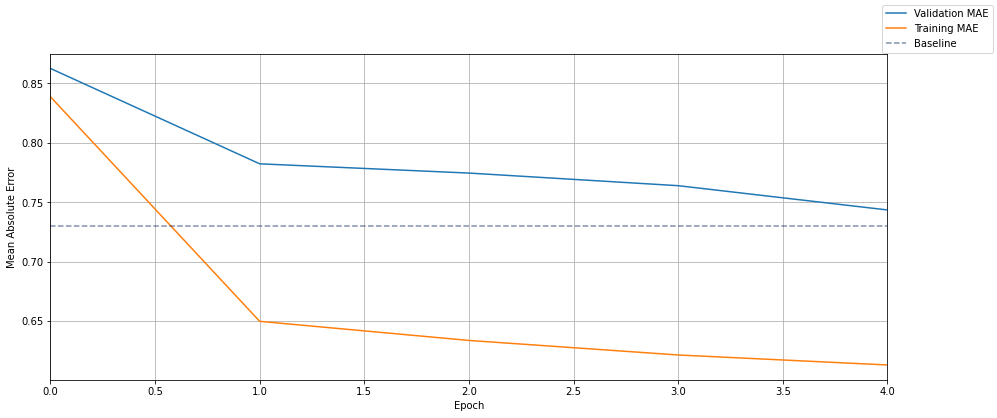

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(history.epoch, history.history['val_MAE'], label='Validation MAE')
ax.plot(history.epoch, history.history['MAE'], label='Training MAE')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Absolute Error')
ax.set_xlim(left=0, right=history.epoch[-1])
baseline_mae = 0.73
ax.axhline(baseline_mae, ls='--', label='Baseline', color='#002255', alpha=.5)
ax.grid()
fig.legend();
